# Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Team-14**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.
 
### Climate Change Belief Analysis 2022

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of classifying whether or not a person believes in climate change;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.


<a id="cont"></a>

## Table of Contents
<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

- <a href=#two>3.1 Numerical and categorical features</a>

- <a href=#four>3.2 Null Values </a>

- <a href=#four>3.3 Descriptive analysis </a>

- <a href=#four>3.4 The target variable </a>

- <a href=#four>3.5 Feature variables </a>


<a href=#four>4. Data Engineering</a>

- <a href=#four>4.1 removing the web-urls</a>

- <a href=#four>4.2 Lowercase conversion </a>

- <a href=#four>4.3 Removing punctuation and special characters </a>

- <a href=#four>4.4 Lemmatization </a>

- <a href=#four>4.5 Removing Stop words </a>

- <a href=#four>4.6 Feature Extraction using CountVectorizer </a>

- <a href=#four>4.7 Preparing the test dataset </a>


<a href=#five>5. Modeling</a>


- <a href=#four>5.1 Logistic regression classification </a>

- <a href=#four>5.2 Decision Tree </a>

- <a href=#four>5.3 Random Forests</a>

- <a href=#four>5.4 Naive Bayes</a>

- <a href=#four>5.5 k nearest neighbuors </a>

- <a href=#four> </a>

- <a href=#four> </a>


<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

## Comet

In [1]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="j6t6QCKPHzxLlzGL6upDixMVs",
    project_name="team-14-classification-sprint",
    workspace="sixolilej",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/sixolilej/team-14-classification-sprint/8f1ff143213e47a3ba517bacd77631bd



<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In this section the necessary libraries that will be used throughout the anaylisis are imported.

---

In [2]:
# Libraries for data loading, data manipulation and data visulisation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import string
import neattext.functions as nt
import neattext.functions as nt

import nltk
from nltk.corpus import stopwords
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.util import ngrams

# Libraries for data preparation and model building
from sklearn.feature_extraction.text import CountVectorizer


# set plot style
sns.set()


#import *

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In this section the data is loaded from the `df_train` file.

---

In [3]:
pd.set_option('display.max_colwidth', None)
df_train = pd.read_csv('train.csv') # load the data
#df_test = pd.read_csv('test.csv') # load the data

In [4]:
# View dataset
df_train.head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


    
In this section,  an in-depth analysis of all the variables in the DataFrame is perfomed.

looking at:

-  Numerical and categorical features
-  Null values
-  Descriptive analysis 
-  The target variable 'sentiment'
-  Feature variables 'message'

###  3.1 Numerical and categorical features

Looking  at the method df.info(). This will provide the information about the data types of the variables, the number of variables and the non-null count for each variable.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


Sentiment and tweetid columns contains numerical data, while clean_message contain Categorical data

###  3.2 Null Values

 Looking at the function df.isnull().sum(). This will give us information about which variables have null values.

In [6]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

There are no null values present in all columns.

###  3.3 Descriptive analysis

To run summary statistics on columns containing `Numerical data`, we use `.describe()` function

In [7]:
df_train.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


Summary statistics on `Categorical` column

In [8]:
df_train.describe(include='object')

,message
count,15819
unique,14229
top,RT @StephenSchlegel: she's thinking about how she's going to die because your husband doesn't believe in climate change https://t.co/SjoFoNÃ¢â‚¬Â¦
freq,307


We notice that there are duplicates in message column, as shown by the unique row. These could be messages retweeted by different people.   

Possible solution would be to drop the duplicate columns. 

###  3.4 The target variable 'sentiment'

##### Class Description (Sentiments)

- 2 : News: the tweet links to factual news about climate change
- 1 : Pro: the tweet supports the belief of man-made climate change
- 0 : Neutral: the tweet neither supports nor refutes the belief of man-made climate change
- -1: Anti: the tweet does not believe in man-made climate change

In [9]:
# list of unique types of Sentiments
type_sentis = list(sorted(df_train.sentiment.unique()))
print(type_sentis)

[-1, 0, 1, 2]


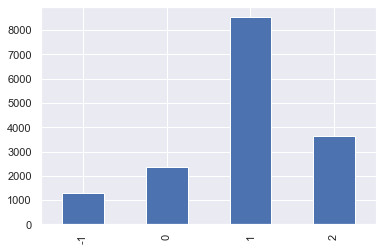

In [10]:
df_train['sentiment'].value_counts().sort_index().plot(kind = 'bar')
plt.show()

We can observe an imbalance with the class samples.

###  3.5 Feature variables 'message'

#### Words cloud of frequently twitted words

We will create a word could image of the frequently twitted word in each of the different classes which are as follows:

* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change

In [11]:
df_gm = df_train.copy()

In [12]:
#create different dataframes for each of the classes
df_news= df_gm.drop(df_gm[df_gm.sentiment <= 1].index)

df_pro= df_gm.drop(df_gm[df_gm.sentiment<=0].index)
df_pro= df_gm.drop(df_gm[df_gm.sentiment>=2].index)

df_neutral= df_gm.drop(df_gm[df_gm.sentiment<=(-1)].index)
df_neutral= df_gm.drop(df_gm[df_gm.sentiment>=1].index)

df_anti= df_gm.drop(df_gm[df_gm.sentiment>=0].index)

Text(0.5, 1.0, 'Anti Tweets')

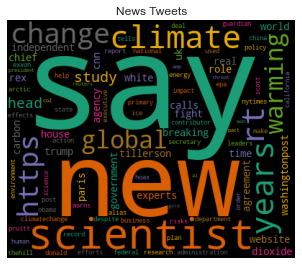

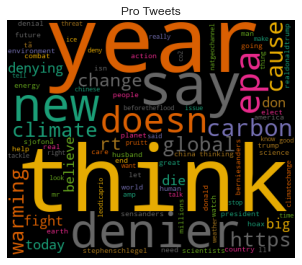

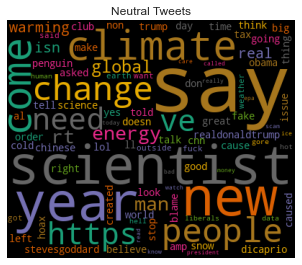

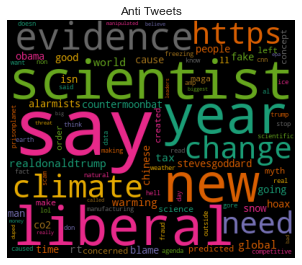

In [13]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

#create instance of WordCloud
wc=WordCloud(width=400, height=330, max_words=150,colormap="Dark2")

#Create string of 100 words
wcVect = CountVectorizer(stop_words='english',max_features=100) 
wcVect.fit(df_news['message'])
text1=list(wcVect.vocabulary_)
text2=string = ' '.join(text1)

text2
#createWordCloud
a=wc.generate(string)

plt.figure(figsize = (4, 8), facecolor = None)
plt.imshow(a)
plt.axis("off")
plt.tight_layout(pad = 0);

plt.title("News Tweets")
##########################################################
#create instance of WordCloud
wc=WordCloud(width=400, height=330, max_words=150,colormap="Dark2")

#Create string of 100 words
wcVect = CountVectorizer(stop_words='english',max_features=100) 
wcVect.fit(df_pro['message'])
text1=list(wcVect.vocabulary_)
text2=string = ' '.join(text1)

text2

#createWordCloud
b=wc.generate(string)


plt.figure(figsize = (4, 8), facecolor = None)
plt.imshow(b)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.title("Pro Tweets")
##################################################################
#create instance of WordCloud
wc=WordCloud(width=400, height=330, max_words=150,colormap="Dark2")

#Create string of 100 words
wcVect = CountVectorizer(stop_words='english',max_features=100) 
wcVect.fit(df_neutral['message'])
text1=list(wcVect.vocabulary_)
text2=string = ' '.join(text1)

text2

#createWordCloud
c=wc.generate(string)


plt.figure(figsize = (4, 8), facecolor = None)
plt.imshow(c)
plt.axis("off")
plt.tight_layout(pad = 0);

plt.title("Neutral Tweets")

#########################################################
#create instance of WordCloud
wc=WordCloud(width=400, height=330, max_words=150,colormap="Dark2")

#Create string of 100 words
wcVect = CountVectorizer(stop_words='english',max_features=100) 
wcVect.fit(df_anti['message'])
text1=list(wcVect.vocabulary_)
text2=string = ' '.join(text1)

text2

#createWordCloud
d=wc.generate(string)


plt.figure(figsize = (4, 8), facecolor = None)
plt.imshow(d)
plt.axis("off")
plt.tight_layout(pad = 0);

plt.title("Anti Tweets")


## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Data engineering is the complex task of making raw data usable for the modeling phase. In this section we engineer the features such that they are ready for modelling


For our dataset, we will be doing the following steps:
* removing the web-urls
* making everything lower case
* removing punctuation and special characters
* removing mentions and retweets(`rt`)

### 4.1 removing the web-urls

In [14]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_train['message'] = df_train['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

### 4.2 Lowercase conversion 

In [15]:
df_train['message'] = df_train['message'].str.lower()

### 4.3 Removing punctuation and special characters

We create a funcion that will remove the web-urls, punctuation, and mentions along with retweets(`rt`)

In [16]:
def data_cleaning(tweet):
    tweet = re.sub(r'@[a-z0-9]+', '', tweet) # removing mentions
    tweet = re.sub(r'#', '', tweet) # remove #
    tweet = re.sub(r'rt[\s]+', '', tweet) # remove retweets(`rt`)
    #tweet = re.sub(r'url-web', '', tweet) # remove web-urls
    
    return tweet

In [17]:
df_train['clean_message'] = df_train['message'].apply(data_cleaning)

In [18]:
df_train.head(2)

,sentiment,message,tweetid,clean_message
0,1,"polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? url-web via @mashable",625221,"polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? url-web via"
1,1,it's not like we lack evidence of anthropogenic global warming,126103,it's not like we lack evidence of anthropogenic global warming


In case of special characters and extra whitespace, we employed NeatText 

In [19]:
# Remove special characters using NeatText
df_train['clean_message'] = df_train['clean_message'].apply(nt.remove_special_characters)

In [20]:
# Remove multiple whitespace between words
df_train['clean_message'] = df_train['clean_message'].apply(nt.remove_multiple_spaces)

In [21]:
df_train.head(2)

,sentiment,message,tweetid,clean_message
0,1,"polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? url-web via @mashable",625221,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urlweb via
1,1,it's not like we lack evidence of anthropogenic global warming,126103,its not like we lack evidence of anthropogenic global warming


In [22]:
df_train[['message','clean_message']].head()

,message,clean_message
0,"polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? url-web via @mashable",polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urlweb via
1,it's not like we lack evidence of anthropogenic global warming,its not like we lack evidence of anthropogenic global warming
2,rt @rawstory: researchers say we have three years to act on climate change before it’s too late url-web url-web…,researchers say we have three years to act on climate change before its too late urlweb urlweb
3,#todayinmaker# wired : 2016 was a pivotal year in the war on climate change url-web,todayinmaker wired 2016 was a pivotal year in the war on climate change urlweb
4,"rt @soynoviodetodas: it's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #electionnight",its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight


In [23]:
df_train = df_train.drop('message', axis=1)

In [24]:
df_train.head(2)

,sentiment,tweetid,clean_message
0,1,625221,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urlweb via
1,1,126103,its not like we lack evidence of anthropogenic global warming


 ### 4.4 Lemmatization

Lemmatization will help in achieving the root forms (synonyms) of the words.

In [25]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemma(words, lemmatizer):
    return ' '.join(([lemmatizer.lemmatize(word) for word in words.split()]))

df_train['clean_message'] = df_train['clean_message'].apply(lemma, args=(lemmatizer, ))

df_train.head(2)


,sentiment,tweetid,clean_message
0,1,625221,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urlweb via
1,1,126103,it not like we lack evidence of anthropogenic global warming


### 4.5 Removing Stop words

In [26]:
#remove stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')

df_train['clean_message']= df_train['clean_message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df_train.head()

,sentiment,tweetid,clean_message
0,1,625221,polyscimajor epa chief doesnt think carbon dioxide main cause global warming wait urlweb via
1,1,126103,like lack evidence anthropogenic global warming
2,2,698562,researcher say three year act climate change late urlweb urlweb
3,1,573736,todayinmaker wired 2016 wa pivotal year war climate change urlweb
4,1,466954,2016 racist sexist climate change denying bigot leading poll electionnight


### 4.6 Feature Extraction using CountVectorizer

In [ ]:
#load unseen data
pd.set_option('display.max_colwidth', None)
df_test= pd.read_csv('test_set.csv')

df_test.head(2)

The text feature extraction module called CountVectorizer is used to convert a collection of documents (rows of text) into a matrix of token counts.

In [26]:
# create vectorizer instance
vect = CountVectorizer()

#fit vectorizer
vect.fit(df_train['clean_message'])

CountVectorizer()

In [27]:
# NUM of predictors
print(len(vect.vocabulary_))

16827


In [28]:
#transform features to numbers for modelling
vect_transform=vect.transform(df_train['clean_message'])

# Get shape of our predictive variables
vect_transform.shape

(15819, 16827)

In [29]:
#total number of words in corpus
total_corpus=sum(vect_transform.toarray().sum(axis=0))
total_corpus

168550

We can seee that there are a features, some of which correspond to words which only appear once. Not all of them are very useful, we must therefore tune vectorizer.

In [30]:
betterVect = CountVectorizer(stop_words='english',max_features=10000) 

betterVect.fit(df_train['clean_message'])

CountVectorizer(max_features=10000, stop_words='english')

In [31]:
betterVect_transform=betterVect.transform(df_train['clean_message'])

# Get shape of our predictive variables
betterVect_transform.shape

(15819, 10000)

In [32]:
#get total words in better corpus
total_better_corpus=sum(betterVect_transform.toarray().sum(axis=0))
total_better_corpus

152627

In [33]:
#percentage of words used 
feature_percentage=round((total_better_corpus/total_corpus)*100)
feature_percentage

91

We will use 89 percent of the word in the total corpus.

In [34]:
X_feat = betterVect_transform.toarray()
X_feat=pd.DataFrame(X_feat, columns = betterVect.get_feature_names())

C:\Users\u1121\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [35]:
X_feat.head()

,10,100,1000,100000,101,105,109c,10yrs,11,110,...,ziploc,zoals,zodiac,zoe,zombie,zombification,zonde,zone,zoo,zukunft
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Scaling

In [36]:
#scaling X

# Import the scaler module
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

# Scale data
X_scaled = scaler.fit_transform(X_feat)

Selecting best performing features

In [37]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import GridSearchCV

X=X_scaled
y=df_train['sentiment']

params_skb = {'k':[1,100,500,1000,5000,8000,10000,13000,15000]}
gs_skb = GridSearchCV(estimator=SelectKBest(), 
                 param_grid=params_skb,    
                 verbose=1, 
                 scoring='mutual_info_score') 
gs_skb.fit(X, y)

gs_skb.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\Users\u1121\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 119  131  271  283  317  432  487  560  671  708  713  757  860  908
  919 1021 1157 1230 1260 1321 1324 1353 1417 1459 1513 1585 1602 1621
 1769 1822 2102 2227 2274 2282 2384 2485 2558 2623 2696 2717 2780 2806
 2899 3046 3074 3261 3458 3472 3715 3724 3762 3927 3992 4052 4086 4199
 4237 4245 4411 4418 4426 4434 4437 4440 4443 4447 4468 4486 4487 4501
 4519 4520 4526 4529 4534 4551 4553 4556 4561 4566 4572 4580 4581 4599
 4606 4621 4640 4652 4655 4670 4685 4693 4694 4698 4702 4705 4714 4727
 4733 4756 4762 4774 4778 4785 4787 4790 4793 4797 4814 4820 4830 4854
 4866 4908 4911 4912 4914 4953 4958 4960 4963 5000 5002 5011 5022 5024
 5045 5050 5059 5068 5108 5131 5162 5169 5173 5177 5198 5205 5215 5219
 5220 5222 5227 5234 5248 5250 5256 5265 5267 5271 5273 5277 5288 5307
 5314 5319 5325 5329 5346 5357 5386 5404 5405 5409 5454 5464 5469 5474
 5485 5496 5498 5499 5524 5

C:\Users\u1121\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  31  107  129  155  232  379  382  435  482  537  646  669  881 1155
 1158 1188 1356 1377 1562 1567 1629 1641 1654 1666 1730 1815 1908 1992
 2009 2259 2362 2415 2461 2632 2664 2728 2853 2862 3068 3078 3211 3214
 3280 3347 3427 3465 3500 3563 3663 3900 3932 4006 4154 4250 4251 4327
 4340 4370 4403 4421 4422 4429 4431 4436 4469 4471 4473 4488 4506 4525
 4528 4538 4540 4549 4555 4558 4564 4587 4604 4607 4615 4616 4619 4627
 4634 4647 4656 4659 4662 4664 4666 4680 4696 4701 4710 4711 4716 4719
 4720 4729 4731 4736 4751 4765 4767 4789 4802 4805 4809 4810 4816 4818
 4821 4823 4826 4841 4845 4858 4865 4872 4884 4888 4892 4894 4903 4904
 4924 4954 4968 4975 4997 5007 5016 5021 5023 5035 5036 5049 5056 5063
 5069 5081 5084 5101 5103 5106 5124 5129 5134 5137 5142 5150 5151 5156
 5159 5166 5167 5171 5191 5212 5217 5226 5230 5236 5246 5251 5252 5253
 5266 5268 5269 5278 5283 5

C:\Users\u1121\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  53   55   85  236  242  682  707  721  727  841  915  973  977  984
 1120 1166 1176 1209 1375 1398 1412 1482 1569 1608 1696 1723 1809 1907
 1910 2037 2165 2222 2273 2286 2320 2486 2516 2633 2663 2672 2709 2742
 2790 2804 2836 2931 2943 3208 3221 3252 3286 3334 3338 3395 3428 3454
 3482 3487 3523 3593 3616 3652 3725 3767 3830 3859 3876 3899 4100 4144
 4152 4193 4226 4244 4291 4329 4366 4423 4424 4427 4435 4442 4449 4465
 4475 4493 4500 4524 4531 4532 4539 4541 4543 4547 4548 4550 4552 4554
 4567 4568 4573 4585 4593 4622 4625 4648 4658 4673 4678 4681 4691 4692
 4700 4724 4725 4734 4742 4744 4745 4750 4766 4770 4781 4796 4799 4833
 4835 4864 4882 4891 4893 4920 4925 4930 4931 4935 4938 4944 4947 4950
 4959 4972 4973 4980 4993 4998 5009 5018 5027 5028 5030 5033 5042 5055
 5061 5071 5078 5086 5100 5109 5113 5117 5128 5139 5144 5145 5157 5175
 5178 5184 5190 5216 5221 5

KeyboardInterrupt: 

In [44]:
from sklearn.metrics import SCORERS

sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

### 4.7 Balancing the classes

Class=1, n=7635 (48.265%)
Class=-1, n=1170 (7.396%)
Class=0, n=2129 (13.458%)
Class=2, n=3303 (20.880%)


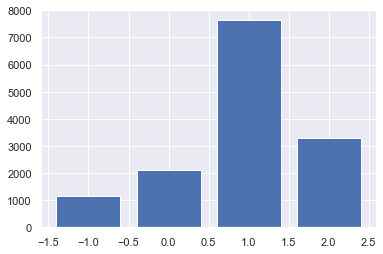

In [39]:
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# split into input and output elements
X=X_scaled
y=df_train['sentiment']

# import train/test split module
from sklearn.model_selection import train_test_split

# Get training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

Class=1, n=7635 (48.265%)
Class=-1, n=7635 (48.265%)
Class=0, n=7635 (48.265%)
Class=2, n=7635 (48.265%)


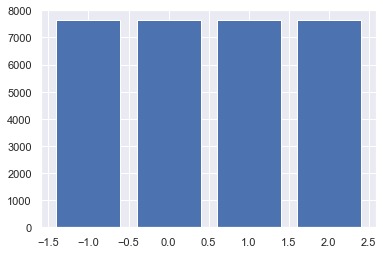

In [50]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# transform the dataset
oversample = SMOTE()

X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

### 4.7 Preparing the test dataset

In [42]:
df_test = pd.read_csv('test_with_no_labels.csv')
#df_test.info()

In [43]:
#removing the web-urls
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_test['message'] = df_test['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

# Lowercase conversion
df_test['message'] = df_test['message'].str.lower()

#Removing punctuation and special characters
def data_cleaning(tweet):
    tweet = re.sub(r'@[a-z0-9]+', '', tweet) # removing mentions
    tweet = re.sub(r'#', '', tweet) # remove #
    tweet = re.sub(r'rt[\s]+', '', tweet) # remove retweets(`rt`)
    #tweet = re.sub(r'url-web', '', tweet) # remove web-urls
    
    return tweet

df_test['clean_message'] = df_test['message'].apply(data_cleaning)

# Remove special characters using NeatText
df_test['clean_message'] = df_test['clean_message'].apply(nt.remove_special_characters)


 ### 4.4 Lemmatization
lemmatizer = WordNetLemmatizer()

def lemma(words, lemmatizer):
    return ' '.join(([lemmatizer.lemmatize(word) for word in words.split()]))

df_test['clean_message'] = df_test['clean_message'].apply(lemma, args=(lemmatizer, ))

#remove stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')

df_test['clean_message']= df_test['clean_message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df_test.head()



,message,tweetid,clean_message
0,europe will now be looking to china to make sure that it is not alone in fighting climate change… url-web,169760,europe looking china make sure alone fighting climate change urlweb
1,combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. url-web,35326,combine polling staffer climate change woman right fascist state urlweb
2,"the scary, unimpeachable evidence that climate change is already here: url-web #itstimetochange #climatechange @zeroco2_;..",224985,scary unimpeachable evidence climate change already urlweb itstimetochange climatechange
3,@karoli @morgfair @osborneink @dailykos \nputin got to you too jill ! \ntrump doesn't believe in climate change at all \nthinks it's s hoax,476263,putin got jill trump doesnt believe climate change think hoax
4,rt @fakewillmoore: 'female orgasms cause global warming!'\n-sarcastic republican,872928,female orgasm cause global warmingsarcastic republican


In [44]:
df_test = df_test.drop('message', axis=1)
df_test.head(2)

,tweetid,clean_message
0,169760,europe looking china make sure alone fighting climate change urlweb
1,35326,combine polling staffer climate change woman right fascist state urlweb


In [45]:
#Count Vectorizer

betterVect_test = CountVectorizer(stop_words='english',max_features=10000)

vect_fit_test=betterVect_test.fit(df_test['clean_message'])

betterVect_transform_test=betterVect_test.transform(df_test['clean_message'])

feat_test=betterVect_transform_test.toarray()

#scaling
feat_test = scaler.fit_transform(feat_test)

feat_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this section, we will create one or more classification models that are able to accurately predict our classes. 

These are the models that will created:



In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import cross_val_score

In [44]:
X=X_scaled
y=df_train['sentiment']

models = [
    LogisticRegression(max_iter=200,random_state=42),
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    DecisionTreeClassifier(random_state=42),
    GaussianNB(),
    KNeighborsClassifier()      
]
# Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [45]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()
acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
DecisionTreeClassifier,0.629749,0.006844
GaussianNB,0.478981,0.004443
KNeighborsClassifier,0.478666,0.014179
LogisticRegression,0.730325,0.004852
RandomForestClassifier,0.539225,0.000076


### 5.1 Logistic regression classification

In [39]:
# import logistic regression module
from sklearn.linear_model import LogisticRegression

# create model object
lr = LogisticRegression(multi_class='ovr',max_iter=200)

# train model
lr.fit(X_train, y_train)

LogisticRegression(max_iter=200, multi_class='ovr')

#### Checking outcomes on the testing set

In [40]:
#Generate predictions
y_pred = lr.predict(X_test)

y_pred=pd.DataFrame(y_pred)

In [41]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

          -1       0.42      0.59      0.49       126
           0       0.46      0.52      0.49       224
           1       0.82      0.68      0.74       895
           2       0.65      0.80      0.72       337

    accuracy                           0.68      1582
   macro avg       0.59      0.65      0.61      1582
weighted avg       0.70      0.68      0.68      1582



#### Predictions on Test

In [46]:
preds=lr.predict(feat_test)

In [47]:
daf=pd.DataFrame(preds,columns=['sentiment'])
daf.head(2)

,sentiment
0,0
1,0


In [49]:
output=pd.DataFrame({'tweetid':df_test['tweetid']})
submission=output.join(daf)
#submission.to_csv('submission3.csv',index=False)

submission

,tweetid,sentiment
0,169760,0
1,35326,0
2,224985,0
3,476263,0
4,872928,-1
...,...,...
10541,895714,0
10542,875167,0
10543,78329,-1
10544,867455,0


### 5.2 Decision Tree

In [49]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
pred_forest_dt = forest.predict(X_test)
pred_forest_dt=pd.DataFrame(pred_forest_dt)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_forest_dt))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

          -1       0.49      0.33      0.40       278
           0       0.44      0.48      0.46       425
           1       0.75      0.79      0.77      1755
           2       0.75      0.68      0.71       706

    accuracy                           0.69      3164
   macro avg       0.61      0.57      0.59      3164
weighted avg       0.68      0.69      0.68      3164



#### Logging results on comet


In [51]:
from sklearn.metrics import accuracy_score

accuracy_rf=accuracy_score(y_test, pred_forest_dt)

params = {"random_state=": 42,
      "model_type": "RandomForestClassifier",
      "scaler:": "standard scale"
         }

metrics = {"Acuracy":accuracy_rf}

In [52]:
experiment.log_parameters(params)
experiment.log_metrics(metrics)

#### Hyperparameter tuning

In [53]:
params_dt = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
gs_nb = GridSearchCV(estimator=forest, 
                 param_grid=params_nb,    
                 verbose=1, 
                 scoring='f1') 
gs_nb.fit(X_train, y_train)

gs_nb.best_params_

NameError: name 'GridSearchCV' is not defined

### 5.3 Random Forests

### 5.4 Naive Bayes

In [41]:
#import the model
from sklearn.naive_bayes import GaussianNB

# Define the model 
naive_bayes = GaussianNB()

# Fit the model 
naive_bayes.fit(X_train, y_train)

GaussianNB()

#### Hyperparameter tuning

In [43]:
from sklearn.model_selection import GridSearchCV

params_nb = {'var_smoothing': np.logspace(0,-9, num=10)}
gs_nb = GridSearchCV(estimator=naive_bayes, 
                 param_grid=params_nb,    
                 verbose=1, 
                 scoring='f1_macro') 
gs_nb.fit(X_train, y_train)

gs_nb.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'var_smoothing': 1e-07}

In [46]:
gs_nb.best_score_

0.7304055317002504

In [44]:
# Define the model 
naive_bayes_better = GaussianNB(var_smoothing=1e-07)
# Fit the model 
naive_bayes_better.fit(X_train, y_train)

GaussianNB(var_smoothing=1e-07)

#### Checking outcomes on the testing set


In [ ]:
# Generate predictions
y_pred_nb = naive_bayes.predict(X_test)

y_pred_nb=pd.DataFrame(y_pred_nb)

# Classification report
print(classification_report(y_test, y_pred_nb))

import warnings
warnings.filterwarnings('ignore')

#### Checking outcomes on tuned model


In [48]:
# Generate predictions
y_pred_nb_better = naive_bayes_better.predict(X_test)

y_pred_nb_better=pd.DataFrame(y_pred_nb_better)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nb_better))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

          -1       0.16      0.44      0.24       126
           0       0.24      0.32      0.27       224
           1       0.72      0.44      0.55       895
           2       0.52      0.61      0.56       337

    accuracy                           0.46      1582
   macro avg       0.41      0.45      0.40      1582
weighted avg       0.56      0.46      0.49      1582



### 5.5 k nearest neighbuors

In [51]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 10 

# Define the model
knn = KNeighborsClassifier(n_neighbors,  weights='distance')
# Fit the model 
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

#### Hyperparameter tuning

In [ ]:
ks = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,20]

param_grid = {'n_neighbors': ks}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='f1')

grid_knn.fit(X, y)
grid_knn.best_params_

In [ ]:
n_neighbors = 1 

#model instance
knn_improved = KNeighborsClassifier(n_neighbors,  weights='distance')
# Fit the model 
knn_improved.fit(X_train, y_train)

#### Checking outcomes on the testing set

In [52]:
# Generate predictions
y_pred_knn = knn.predict(X_test)

y_pred_knn=pd.DataFrame(y_pred_knn)

# Classification report
print(classification_report(y_test, y_pred_knn))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

          -1       0.21      0.58      0.31       126
           0       0.24      0.69      0.36       224
           1       0.91      0.27      0.41       895
           2       0.61      0.61      0.61       337

    accuracy                           0.43      1582
   macro avg       0.49      0.54      0.42      1582
weighted avg       0.70      0.43      0.44      1582



#### Checking outcomes on tuned model


In [ ]:
# Generate predictions
y_pred_knn_improved = knn_improved.predict(X_test)

y_pred_knn_improved=pd.DataFrame(y_pred_knn_improved)

# Classification report
print(classification_report(y_test, y_pred_knn_improved))

import warnings
warnings.filterwarnings('ignore')

In [ ]:
experiment.end()